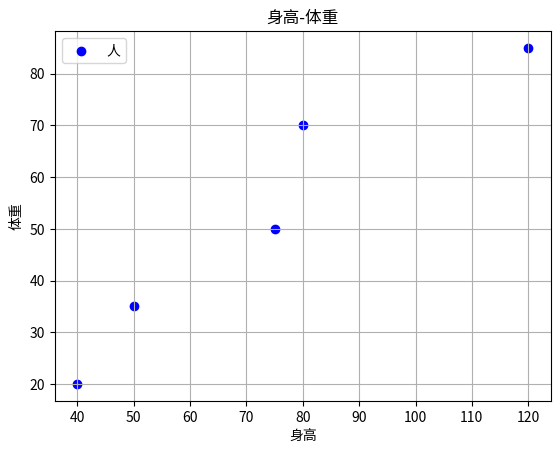

截距: -6.701030927835049
斜率: [0.80412371]
预测体重: [73.71134021]


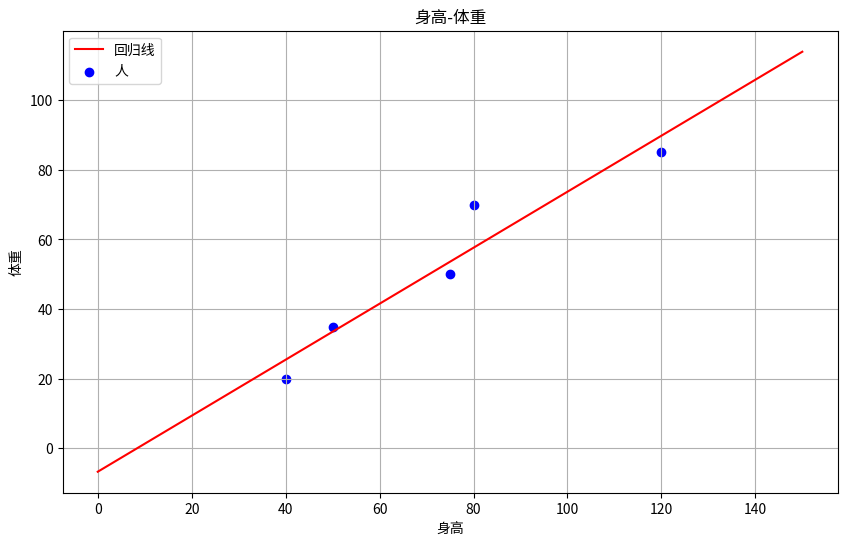

In [3]:
# 身高
data =   [40, 80, 50, 75, 120]
# 体重
target = [20, 70, 35, 50, 85 ]

# 绘制图像
import matplotlib.pyplot as plt # pip install matplotlib
# 设置中文 字体
# 以下命令查找字体路径
# fc-list :lang=zh
from matplotlib import rcParams
# 设置字体为思源黑体
rcParams['font.sans-serif'] = ['Source Han Sans CN']  # 设置字体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# plt.figure(figsize=(10, 6))
plt.scatter(data, target, color='blue', label='人')
plt.title('身高-体重')
plt.xlabel('身高')
plt.ylabel('体重')
plt.legend()
plt.grid()
plt.show()
# 线性回归
from sklearn.linear_model import LinearRegression # pip install scikit-learn
# 训练模型
model = LinearRegression()
# 训练数据
X = [[i] for i in data]
Y = target
model.fit(X, Y)
# 预测
pred = model.predict([[100]])
# 打印模型参数
print('截距:', model.intercept_)
print('斜率:', model.coef_)
print('预测体重:', pred)
# 画出回归线
import numpy as np
# 生成数据
x = np.linspace(0, 150, 100)
y = model.predict(x.reshape(-1, 1))

plt.figure(figsize=(10, 6))
# 绘制回归线
plt.plot(x, y, color='red', label='回归线')
# 绘制散点图
plt.scatter(data, target, color='blue', label='人')
plt.title('身高-体重')
plt.xlabel('身高')
plt.ylabel('体重')
plt.legend()
plt.grid()
plt.show()

```math
y = b + kx \\
y = \theta_0 + \theta_1 x_1 \\
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
```